# 二、利用wordcloud制作词云图

## 2.1 从一个简单的例子开始

In [1]:
import re

with open('constitution.txt') as c:
    '''抽取文本中的英文部分并小写化，并将空格作为分隔拼接为长字符串'''
    text = ' '.join([word.group().lower() for word in re.finditer('[a-zA-Z]+', c.read())])

'''查看前100个字符'''
text[:500]

'we the people of the united states in order to form a more perfect union establish justice insure domestic tranquility provide for the common defence promote the general welfare and secure the blessings of liberty to ourselves and our posterity do ordain and establish this constitution for the united states of america article i section all legislative powers herein granted shall be vested in a congress of the united states which shall consist of a senate and house of representatives section the '

* 图5

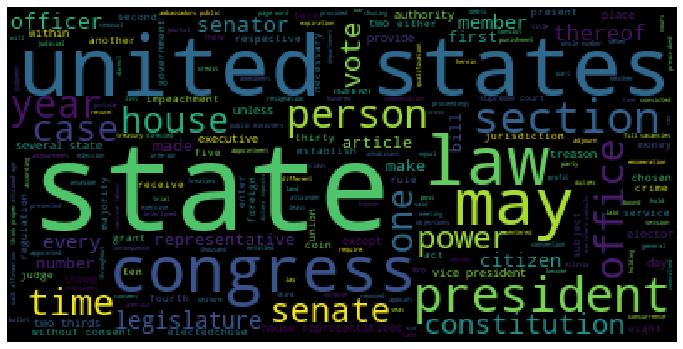

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

'''从文本中生成词云图'''
wordcloud = WordCloud().generate(text)
plt.figure(figsize=[12, 10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2.2 WordCloud

* 图6

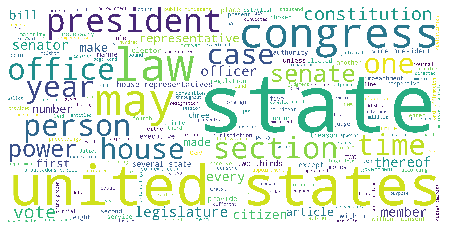

In [3]:
'''从文本中生成词云图'''
wordcloud = WordCloud(background_color='white', # 背景色为白色
                      height=400, # 高度设置为400
                      width=800, # 宽度设置为800
                      scale=20, # 长宽拉伸程度设置为20
                      prefer_horizontal=0.9999).generate(text)
plt.figure(figsize=[8, 4])
plt.imshow(wordcloud)
plt.axis('off')
'''保存到本地'''
plt.savefig('图6.jpg', dpi=600, bbox_inches='tight', quality=95)
plt.show()

* 图8

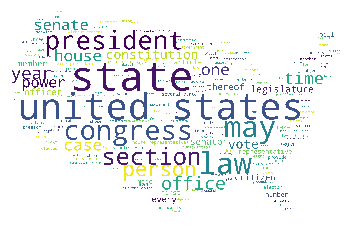

In [4]:
from PIL import Image
import numpy as np

usa_mask = np.array(Image.open('美国本土地图蒙版.png'))

'''从文本中生成词云图'''
wordcloud = WordCloud(background_color='white', # 背景色为白色
                      height=4000, # 高度设置为400
                      width=8000, # 宽度设置为800
                      scale=20, # 长宽拉伸程度程度设置为20
                      prefer_horizontal=0.9999,
                      mask=usa_mask # 添加蒙版
                     ).generate(text)
plt.figure(figsize=[8, 4])
plt.imshow(wordcloud)
plt.axis('off')
'''保存到本地'''
plt.savefig('图8.jpg', dpi=600, bbox_inches='tight', quality=95)
plt.show()

* 图10

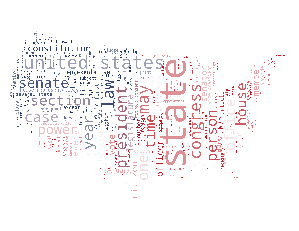

In [5]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

usa_mask = np.array(Image.open('美国地图蒙版_星条旗色.png'))
image_colors = ImageColorGenerator(usa_mask)

'''从文本中生成词云图'''
wordcloud = WordCloud(background_color='white', # 背景色为白色
                      height=400, # 高度设置为400
                      width=800, # 宽度设置为800
                      scale=20, # 长宽拉伸程度程度设置为20
                      prefer_horizontal=0.2, # 调整水平显示倾向程度为0.2
                      mask=usa_mask, # 添加蒙版
                      max_words=1000, # 设置最大显示字数为1000
                      relative_scaling=0.3, # 设置字体大小与词频的关联程度为0.3
                      max_font_size=80 # 缩小最大字体为80
                     ).generate(text)

plt.figure(figsize=[8, 4])
plt.imshow(wordcloud.recolor(color_func=image_colors), alpha=1)
plt.axis('off')
'''保存到本地'''
plt.savefig('图10.jpg', dpi=600, bbox_inches='tight', quality=95)
plt.show()

## 2.3 中文词云图

In [6]:
import pandas as pd
import jieba
import re

'''读入原始数据'''
raw_comments = pd.read_csv('waimai_10k.csv');raw_comments.head()

,label,review
0,1,很快，好吃，味道足，量大
1,1,没有送水没有送水没有送水
2,1,非常快，态度好。
3,1,方便，快捷，味道可口，快递给力
4,1,菜味道很棒！送餐很及时！


In [7]:
'''导入停用词表'''
with open('stopwords.txt') as s:
    stopwords = set([line.replace('\n', '') for line in s])

'''传入apply的预处理函数，完成中文提取、分词以及多余空格剔除'''
def preprocessing(c):
    
    c = [word for word in jieba.cut(' '.join(re.findall('[\u4e00-\u9fa5]+', c))) if word != ' ' and word not in stopwords]

    return ' '.join(c)

'''将所有语料按空格拼接为一整段文字'''
comments = ' '.join(raw_comments['review'].apply(preprocessing));comments[:500]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\pengz\AppData\Local\Temp\jieba.cache
Loading model cost 0.605 seconds.
Prefix dict has been built succesfully.


'很快 好吃 味道 足 量 送水 送水 送水 态度 快捷 味道 可口 递给 力 菜 味道 很棒 送餐 师傅 手抖 微辣 辣 送餐 态度 特别 辛苦 谢谢 超级 送到 冷 天气 骑士 辛苦 谢谢你们 麻辣 香锅 依然 好吃 上次 晚 小时 超级 分钟 送到 五分钟 订 卖家 特别 接单 谢谢 量 好吃 每次 点 够吃 两次 挺辣 吃 味道 送餐 分量 足 量足 好吃 送餐 特别 好吃 量 特大 送餐 特别 特别 特别 棒 口感 速度 好吃 香锅 分量 够 足 味道 说 好吃 速度 包装 品质 家门 吃 餐厅 味道 味道 好极 送餐 很快 师傅 辛苦 量 味道 送餐 师傅 送餐 师傅 味道 好极 送货 速度 很快 这家 赞 很快 送到 棒 好吃 总点 多够 五个 吃 送 很快 很香 美味 下次 还会 光顾 送餐 特别 态度 辛苦 服务 不错 送到 很快 半小时 不到 送来 速度 很快 大雾 霾 天 外卖 骑士 态度 赞赞赞 味道 正宗 量 内容 送餐 态度 特别 谢谢 又快又好 量足 吃 好大 一盆 点 份量 足 配送 人员 态度 速度 天气 里 感谢 送 餐员 辛苦 服务 谢谢 送餐 特别'

- 图14

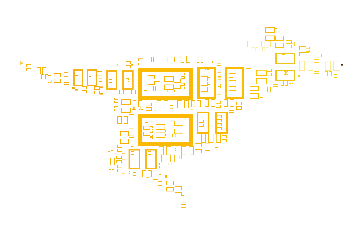

In [8]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

waimai_mask = np.array(Image.open('美团外卖logo蒙版.png'))
image_colors = ImageColorGenerator(waimai_mask)

'''从文本中生成词云图'''
wordcloud = WordCloud(background_color='white', # 背景色为白色
                      height=400, # 高度设置为400
                      width=800, # 宽度设置为800
                      scale=20, # 长宽拉伸程度程度设置为20
                      prefer_horizontal=0.2, # 调整水平显示倾向程度为0.2
                      mask=waimai_mask, # 添加蒙版
                      max_words=1000, # 设置最大显示字数为1000
                      relative_scaling=0.3, # 设置字体大小与词频的关联程度为0.3
                      max_font_size=80 # 缩小最大字体为80
                     ).generate(comments)

plt.figure(figsize=[8, 4])
plt.imshow(wordcloud.recolor(color_func=image_colors), alpha=1)
plt.axis('off')
'''保存到本地'''
plt.savefig('图14.jpg', dpi=600, bbox_inches='tight', quality=95)
plt.show()

- 图15

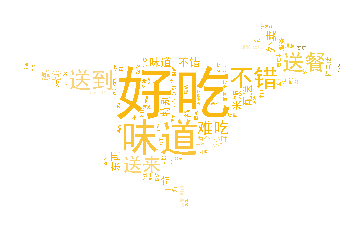

In [9]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

waimai_mask = np.array(Image.open('美团外卖logo蒙版.png'))
image_colors = ImageColorGenerator(waimai_mask)

'''从文本中生成词云图'''
wordcloud = WordCloud(font_path='SimHei.ttf', # 定义SimHei字体文件
                      background_color='white', # 背景色为白色
                      height=400, # 高度设置为400
                      width=800, # 宽度设置为800
                      scale=20, # 长宽拉伸程度程度设置为20
                      prefer_horizontal=0.2, # 调整水平显示倾向程度为0.2
                      mask=waimai_mask, # 添加蒙版
                      max_words=1000, # 设置最大显示字数为1000
                      relative_scaling=0.3, # 设置字体大小与词频的关联程度为0.3
                      max_font_size=80 # 缩小最大字体为80
                     ).generate(comments)

plt.figure(figsize=[8, 4])
plt.imshow(wordcloud.recolor(color_func=image_colors), alpha=1)
plt.axis('off')
'''保存到本地'''
plt.savefig('图15.jpg', dpi=600, bbox_inches='tight', quality=95)
plt.show()

# 三、利用stylecloud制作词云图

- 图17

## 3.1 从一个简单的例子开始

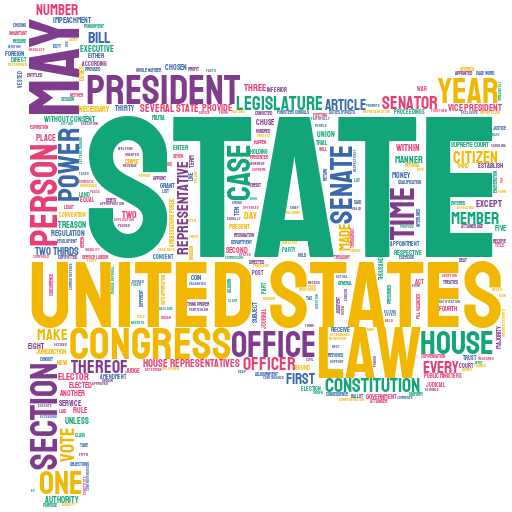

In [10]:
import stylecloud
from IPython.display import Image # 用于在jupyter lab中显示本地图片

'''生成词云图'''
stylecloud.gen_stylecloud(text=text, 
                          size=512,
                          output_name='图17.png')

'''显示本地图片'''
Image(filename='图17.png') 

- 图18

## 3.2 gen_stylecloud

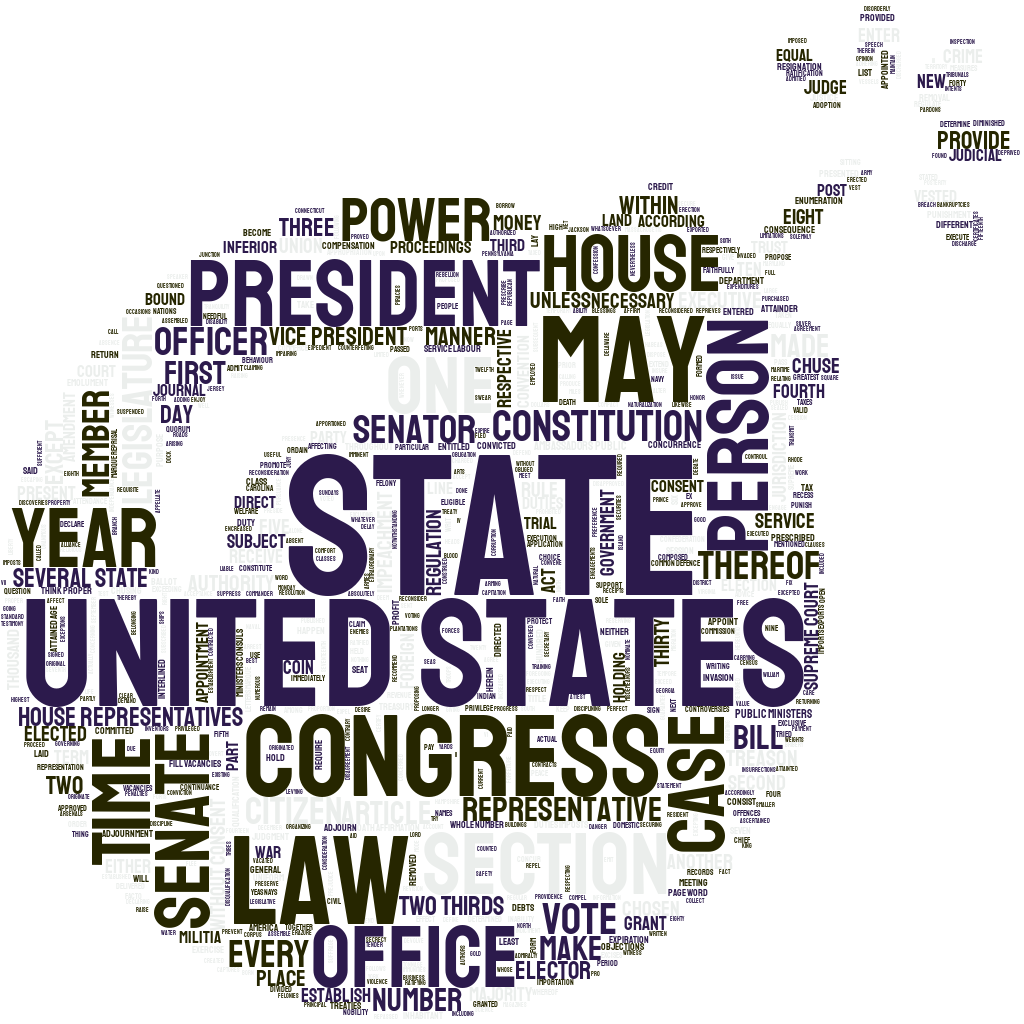

In [11]:
'''生成词云图'''
stylecloud.gen_stylecloud(text=text, 
                          size=1024,
                          output_name='图18.png',
                          palette='scientific.diverging.Broc_3', # 设置配色方案
                          icon_name='fas fa-bomb', # 设置图标样式
                         )

'''显示本地图片'''
Image(filename='图18.png') 

## 3.3 绘制中文词云图

In [12]:
weibo = pd.read_csv('weibo_senti_100k.csv')
weibo_text = [word for word in jieba.cut(' '.join(re.findall('[\u4e00-\u9fa5]+', ' '.join(weibo['review'].tolist())))) if word != ' ' and word not in stopwords]
weibo_text[:10]

['更博', '爆照', '帅', '越来越', '爱', '生快', '傻', '缺', '爱', '爱']

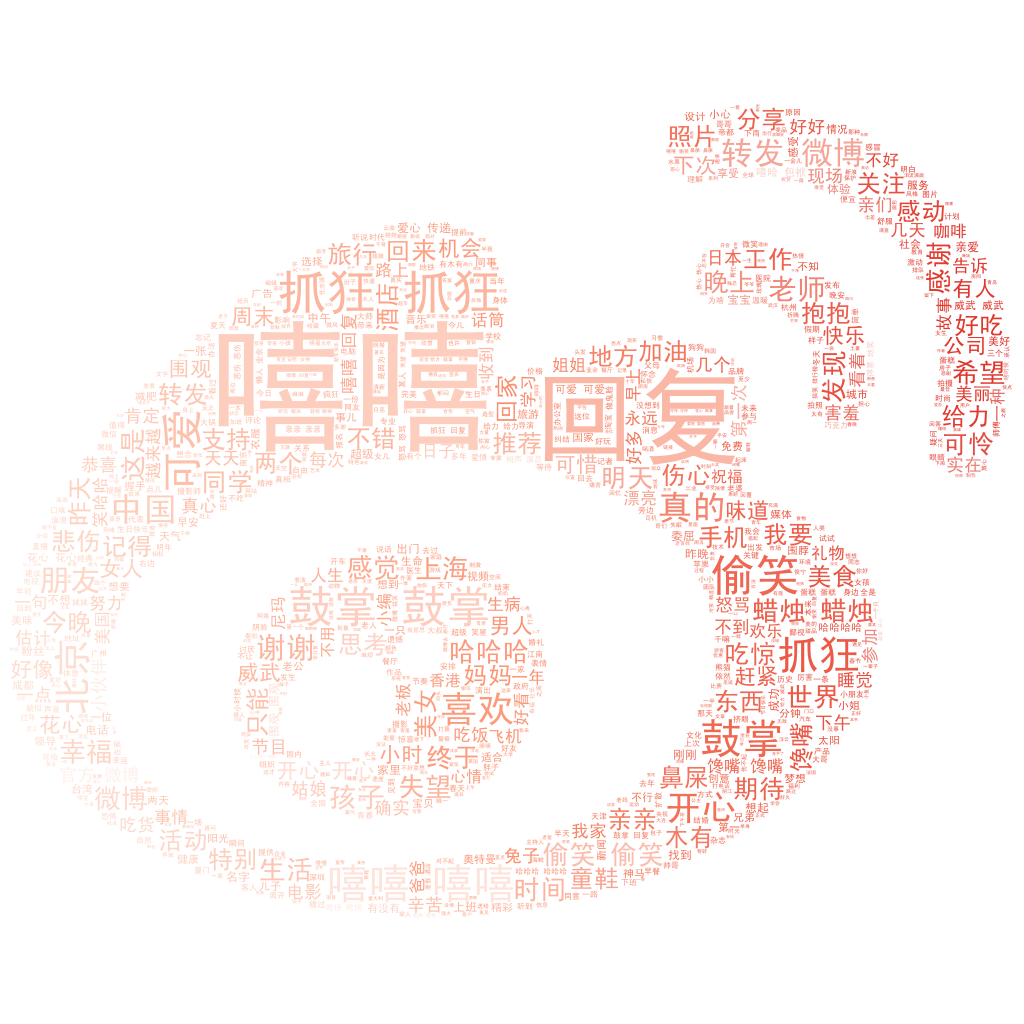

In [13]:
'''生成词云图'''
stylecloud.gen_stylecloud(text=' '.join(weibo_text), 
                          size=1024,
                          output_name='图20.png',
                          palette='colorbrewer.sequential.Reds_3', # 设置配色方案为https://jiffyclub.github.io/palettable/colorbrewer/sequential/#reds_3
                          icon_name='fab fa-weibo', # 设置图标样式
                          gradient='horizontal', # 设置颜色渐变方向为水平
                          font_path='SimHei.ttf'
                         )

'''显示本地图片'''
Image(filename='图20.png') 